In [1]:
#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Vanishing/Exploding Gradients Problem



In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

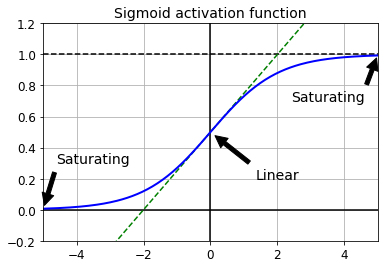

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("sigmoid_saturation_plot")
plt.show()

# Xavier and He initialization

In [5]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [6]:
# Applying the He initialization
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [7]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

# Nonsaturating activation functions

In [10]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [8]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)


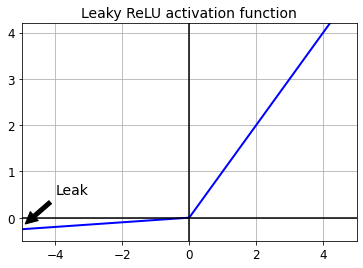

In [9]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

#save_fig("leaky_relu_plot")
plt.show()

In [15]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [2]:
# Let's train a neural network on Fashion MNIST using the Leaky ReLU:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Getting 5k instances for validation and 55 for training
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [63]:
tf.random.set_seed(42)
np.random.seed(42)

# Build the model with LeakyReLU and He_normal initialization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

In [64]:
# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [65]:
# Train the model 
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7902
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy:

In [66]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8242


[0.5155050158500671, 0.8241999745368958]

Train the same model with PReLU:

In [67]:
tf.random.set_seed(42)
np.random.seed(42)

# Build the model with LeakyReLU and He_normal initialization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

In [68]:
# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [69]:
# Train the model 
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6564 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8050
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

In [70]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.8241: 0s - loss: 0.5185 - accura


[0.5144063234329224, 0.8241000175476074]

# SELU

This activation function was proposed in 2017. During the training a NN composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize. In other words, the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. 

As a result, the SELU outperforms the other activation functions very significantly for such neural nets. Unfortunately, the self-normalizing property of the SELU activation function is easily broken. The $\ell_{1}$ and $\ell_{2}$ regularizations can't be used, as well the regular dropouts, max-norm, and others. 

However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions. 


In [33]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)


In [36]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

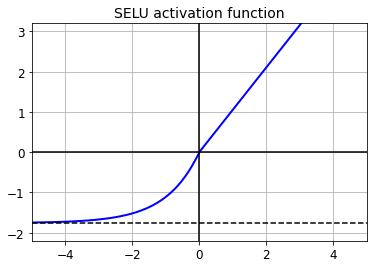

In [38]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

#save_fig("selu_plot")
plt.show()

The scale and alpha values are chosen in a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and std 1 too).

With this activation function, even a 1000 layer deep-NN preserves roughy the 0-mean and 1-std configuration through all its layers,  avoiding the exploding/vanishing gradient problem.

In [50]:
np.random.seed(42)
Z = np.random.normal(size=(500,100))   # Standardized inputs, normal distribution
# mean = -0.0004208985797401041
# std = 1.0001598664026605
for layer in range(1000):
    W = np.random.normal(size=(100,100), scale=np.sqrt(1/100))   # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 50 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 50: mean 0.04, std deviation 0.98
Layer 100: mean 0.02, std deviation 0.96
Layer 150: mean 0.01, std deviation 0.88
Layer 200: mean 0.01, std deviation 0.90
Layer 250: mean -0.03, std deviation 0.87
Layer 300: mean -0.02, std deviation 0.92
Layer 350: mean -0.00, std deviation 0.90
Layer 400: mean 0.05, std deviation 0.89
Layer 450: mean 0.01, std deviation 0.94
Layer 500: mean 0.01, std deviation 0.93
Layer 550: mean 0.04, std deviation 0.99
Layer 600: mean 0.02, std deviation 0.92
Layer 650: mean -0.00, std deviation 0.93
Layer 700: mean -0.02, std deviation 0.90
Layer 750: mean -0.04, std deviation 0.91
Layer 800: mean 0.05, std deviation 0.83
Layer 850: mean -0.01, std deviation 0.95
Layer 900: mean 0.02, std deviation 1.00
Layer 950: mean -0.02, std deviation 0.95


# Train the model with SELU

In [71]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))   # input layer
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):       # Add 99 100-neurons hidden layers
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation='softmax'))

In [72]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In order to training this model, it is necessary to scale the inputs to have mean 0 and std 1.

In [3]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled  = (X_test  - pixel_means) / pixel_stds

In [74]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 12ms/step - loss: 1.2437 - accuracy: 0.5136 - val_loss: 1.0442 - val_accuracy: 0.6060
Epoch 2/5
1719/1719 [==============================] - 20s 12ms/step - loss: 1.0568 - accuracy: 0.6038 - val_loss: 0.8492 - val_accuracy: 0.6824
Epoch 3/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.8998 - accuracy: 0.6619 - val_loss: 0.7964 - val_accuracy: 0.7038
Epoch 4/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.7387 - accuracy: 0.7313 - val_loss: 0.6751 - val_accuracy: 0.7554
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.6630 - accuracy: 0.7565 - val_loss: 0.5850 - val_accuracy: 0.7886


Now look at what happens if we try to use the ReLU activation function instead:

In [75]:
np.random.seed(42)
tf.random.set_seed(42)

In [76]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))   # input layer
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):       # Add 99 100-neurons hidden layers
    model.add(keras.layers.Dense(100, activation="relu",
                                 kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation='softmax'))

In [77]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [78]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 12ms/step - loss: 1.7682 - accuracy: 0.2741 - val_loss: 1.3060 - val_accuracy: 0.3864
Epoch 2/5
1719/1719 [==============================] - 39s 23ms/step - loss: 1.2256 - accuracy: 0.4781 - val_loss: 1.1808 - val_accuracy: 0.4822
Epoch 3/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.9104 - accuracy: 0.6321 - val_loss: 0.8720 - val_accuracy: 0.6402
Epoch 4/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.7976 - accuracy: 0.6908 - val_loss: 0.7200 - val_accuracy: 0.7324
Epoch 5/5
1719/1719 [==============================] - 30s 18ms/step - loss: 0.7394 - accuracy: 0.7217 - val_loss: 0.7023 - val_accuracy: 0.7286


# Batch Normalization 

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [6]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8364 - accuracy: 0.7186 - val_loss: 0.5440 - val_accuracy: 0.8188
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5681 - accuracy: 0.8046 - val_loss: 0.4728 - val_accuracy: 0.8418
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5122 - accuracy: 0.8211 - val_loss: 0.4390 - val_accuracy: 0.8518
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4777 - accuracy: 0.8321 - val_loss: 0.4173 - val_accuracy: 0.8606
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4560 - accuracy: 0.8402 - val_loss: 0.4034 - val_accuracy: 0.8632.4575 - 
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4365 - accuracy: 0.8461 - val_loss: 0.3925 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4218 - accuracy: 0.8515 - val_loss: 0.3834 - val_a

The application of the BN before the activation function can work better. 

The layer before bN doesn't need to have bias terms, since the BN layer has some as will. In this sense, it is possible to set the bias of these layers as false.

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),     # set bias to false
    keras.layers.BatchNormalization(),           # the BN layer before the act. function
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0524 - accuracy: 0.6810 - val_loss: 0.6683 - val_accuracy: 0.7966
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6753 - accuracy: 0.7873 - val_loss: 0.5511 - val_accuracy: 0.8262
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5887 - accuracy: 0.8080 - val_loss: 0.4968 - val_accuracy: 0.8396
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5452 - accuracy: 0.8185 - val_loss: 0.4657 - val_accuracy: 0.8456
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5127 - accuracy: 0.8259 - val_loss: 0.4430 - val_accuracy: 0.8516
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4916 - accuracy: 0.8338 - val_loss: 0.4263 - val_accuracy: 0.8576
Epoch 7/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4720 - accuracy: 0.8387 - val_loss: 0.4124 - val_accuracy

# Reusing Pretrained Layers (Reusing a Keras model)

Let's split the fashion MNIST training set in two:

1. It contains all images of all items except for sandals and shirts (classes 5 and 6)   (Task A)
2. A much smaller training set of just 200 images of only sandals and shirts             (Task B)

The validation set and the set are also splitted in this way, but with no restrictions concerning the number of images

The task will be the following:

1. We will train a model on set A (classification task with 8 classes) and try to reuse it to tackle set B (binary classification);
2. We hope to transfer a bit of knowledge from task A to task B, since the classes on set A are somewhat similar to classes in set B;
3. However, since we are using Dense layers, only patterns that occur at the same location can be used.

In [13]:
# Define a function to split the dataset
def split_dataset(X,y):
    y_5_or_6 = (y == 5) | (y == 6)    # Make a mask for Task A
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2                 # Class indices 7,8,9 should moved to 5,6,7
    y_B = (y[y_5_or_6] == 6).astype(np.float32)   # Binary classification
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

In [14]:
# Task A, dataset with all classes except for sandals and shirts
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)   # Train
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)   # Validation
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)         # Test

# Task B, 200 images of sandals and shirts 
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [17]:
print(X_train_A.shape)
print(X_train_B.shape)

(43986, 28, 28)
(200, 28, 28)


In [18]:
tf.random.set_seed(42)
np.random.seed(42)

In [19]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):           
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [20]:
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                

In [21]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.9011
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2775 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2730 - accuracy: 0.9060 - val_loss: 0.2736 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2718 - val_accuracy:

In [22]:
# Save model A for a future use
model_A.save('my_model_A.h5')

In [23]:
# Define the model for task B
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))          # Binary classification 

In [24]:
model_B.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [25]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 45ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 33ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [29]:
# Create a third model which will use the layers from model A 
model_A = keras.models.load_model('my_model_A.h5')             # Load the saved model 
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])    # All layers from model A except the last one
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))  # Add the output layer for the binary classification

In [30]:
model_B_on_A.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

The models B_on_A and model_A share the same layers, a training in one of the models will update both. 
In order to solve this problem, it is necessary to build model_B_on_A on top of a clone of model_A

In [32]:
model_A_clone = keras.models.clone_model(model_A)              # Clone the model
model_A_clone.set_weights(model_A.get_weights())               # Get the weights from model_A
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])    # All layers from model A except the last one
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))  # Add the output layer for the binary classification

In [33]:
model_B_on_A.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [35]:
# It is likely that the lower layers of the first DNN have learned to detect low-level features in pictures
# that will be useful across both image classification tasks, so you can just reuse these layers as they are.

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False    # Freeze the layer

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

#  It is generally a good idea to “freeze” their weights when training the new DNN: if the lower-layer weights are fixed, 
# then the higher-layer weights will be easier to train

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 52ms/step - loss: 0.8937 - accuracy: 0.4250 - val_loss: 0.8503 - val_accuracy: 0.4797
Epoch 2/4
7/7 [==============================] - 0s 25ms/step - loss: 0.8103 - accuracy: 0.5100 - val_loss: 0.7755 - val_accuracy: 0.5426
Epoch 3/4
7/7 [==============================] - 0s 22ms/step - loss: 0.7362 - accuracy: 0.6150 - val_loss: 0.7117 - val_accuracy: 0.5913
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.6733 - accuracy: 0.6600 - val_loss: 0.6558 - val_accuracy: 0.6450


In [36]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

# Train the remaining epochs
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 50ms/step - loss: 0.5214 - accuracy: 0.7550 - val_loss: 0.4091 - val_accuracy: 0.8509
Epoch 2/16
7/7 [==============================] - 0s 17ms/step - loss: 0.3421 - accuracy: 0.9100 - val_loss: 0.3022 - val_accuracy: 0.9290
Epoch 3/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2533 - accuracy: 0.9600 - val_loss: 0.2429 - val_accuracy: 0.9625
Epoch 4/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2028 - accuracy: 0.9800 - val_loss: 0.2032 - val_accuracy: 0.9726
Epoch 5/16
7/7 [==============================] - 0s 16ms/step - loss: 0.1685 - accuracy: 0.9900 - val_loss: 0.1758 - val_accuracy: 0.9777
Epoch 6/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1441 - accuracy: 0.9950 - val_loss: 0.1552 - val_accuracy: 0.9797
Epoch 7/16
7/7 [==============================] - 0s 29ms/step - loss: 0.1259 - accuracy: 0.9950 - val_loss: 0.1390 - val_accuracy: 0.9828
Epoch 8/16
7/7 [===========

In [39]:
# Evaluate the models
# We hope that the transfer learning helped the improve of the performance of the model_B_on_A

model_B.evaluate(X_test_B, y_test_B)
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9950


[0.07652539014816284, 0.9950000047683716]

# Faster Optimizers

In [41]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)                 # SGD + momentum
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True)  # SGD + nesterov acc. gradient
optimizer = keras.optimizers.Adagrad(learning_rate=1e-3)                           # AdaGrad
optimizer = keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)                  # RMSprop
optimizer = keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)    # Adam optimization
optimizer = keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)  # Adamax optimization
optimizer = keras.optimizers.Nadam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)   # Nadam optimization

# Learning Rate Scheduling

Power scheduling: 

lr = $\frac{lr_{0}}{(1 + steps/s)^{c}}$

c = 1, s = 1/decay (Keras)

In [4]:
# Define the optimizer
optimizer = keras.optimizers.SGD(learning_rate=1e-2, decay=1e-4)   

In [11]:
# Define model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),   # selu + lecun normal = batch normalization
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train
n_epochs=25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6094 - accuracy: 0.7891 - val_loss: 0.4785 - val_accuracy: 0.8354
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4526 - accuracy: 0.8413 - val_loss: 0.4348 - val_accuracy: 0.8504
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4179 - accuracy: 0.8530 - val_loss: 0.4126 - val_accuracy: 0.8606
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3969 - accuracy: 0.8607 - val_loss: 0.4033 - val_accuracy: 0.8596
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8647 - val_loss: 0.3902 - val_accuracy: 0.8688
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3701 - accuracy: 0.8699 - val_loss: 0.3861 - val_accuracy: 0.8672
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3600 - accuracy: 0.8739 - val_loss: 0.3826 - val_accuracy:

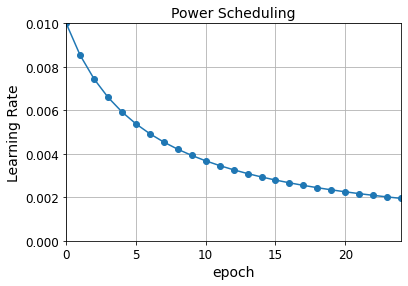

In [20]:
# Investigate the learning rate

import math
learning_rate = 1e-2
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)     # Round a number upward to its nearest integer
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay*epochs*n_steps_per_epoch)   # Power scheduling

# Plot
plt.plot(epochs, lrs, 'o-')
plt.axis([0, n_epochs - 1, 0, 0.01])    # axis([xmin, xmax, ymin, ymax])
plt.xlabel('epoch')
plt.ylabel('Learning Rate')
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# Exponential Scheduling 

lr = $lr_{0} * 0.1^{epoch/s}$

In [4]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch/20)

In [7]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch/s)
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=1e-2, s=20)

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [9]:
# Define the learning rate scheduler
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.7270 - accuracy: 0.7654 - val_loss: 55.3226 - val_accuracy: 0.5970
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5114 - accuracy: 0.8242 - val_loss: 177.0779 - val_accuracy: 0.5150
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4407 - accuracy: 0.8479 - val_loss: 446.6820 - val_accuracy: 0.3332
Epoch 4/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4053 - accuracy: 0.8600 - val_loss: 771.0358 - val_accuracy: 0.3198
Epoch 5/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3745 - accuracy: 0.8693 - val_loss: 1311.0208 - val_accuracy: 0.2442
Epoch 6/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3515 - accuracy: 0.8762 - val_loss: 1209.6296 - val_accuracy: 0.2628
Epoch 7/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3285 - accuracy: 0.8850 - val_loss: 19

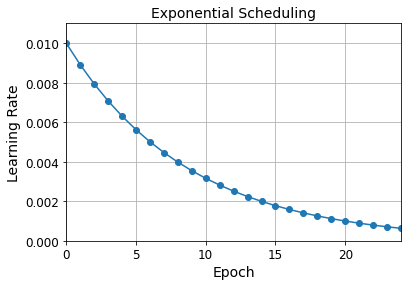

In [16]:
# Plot the learning rate behaviour
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])                 # axis([xmin, xmax, ymin, ymax])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14) 
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument.

As the following:

In [4]:
def exponential_decay_fn(epoch,lr):
    return lr * 0.1**(1 / 20)

To update the learning rate at each ITERATION rather than at each EPOCH. 

It is necessary to write your own callback class

In [5]:
K = keras.backend

# The callback class
class ExponentialDecay(keras.callbacks.Callback):     # keras callbacks as the class object
    def __init__(self, s=40000):  ## initialize the class' attributes
        super().__init__()        ## allows us to avoid using the base class name explicitly
        self.s = s 
        
    def on_batch_begin(self, batch, logs=None):
        # The 'batch' argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)                     # Get the learning rate from the model
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))  # Set the exponential scheduling
    
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)             # Get the learning rate from the model
     
    
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

lr0 = 0.01  # initial learning rate
optimizer = keras.optimizers.Nadam(learning_rate=lr0)   # optimizer with the initial learning rate
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs=25

s = 20 * len(X_train) // 32    # Number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, 
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[exp_decay])
         

Epoch 1/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7902 - accuracy: 0.7697 - val_loss: 0.7666 - val_accuracy: 0.7768
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6651 - accuracy: 0.7995 - val_loss: 0.6525 - val_accuracy: 0.8078
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5563 - accuracy: 0.8272 - val_loss: 0.5007 - val_accuracy: 0.8346
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5089 - accuracy: 0.8421 - val_loss: 0.5201 - val_accuracy: 0.8592
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4598 - accuracy: 0.8534 - val_loss: 0.5150 - val_accuracy: 0.8582
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4295 - accuracy: 0.8605 - val_loss: 0.4665 - val_accuracy: 0.8592
Epoch 7/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3840 - accuracy: 0.8760 - val_loss: 0.4242 - val_ac

In [6]:
n_steps = n_epochs * len(X_train) // 32   # batch size = 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1 **(steps/s)               # scheduled learning rate

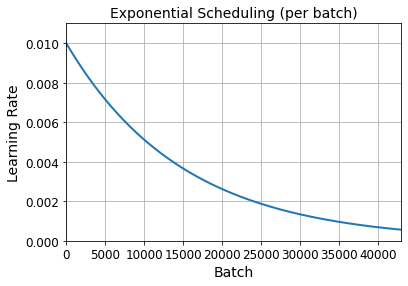

In [7]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

# Performance Scheduling

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5) # Reduce learning rate when a metric has stopped improving


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)   # SGD + momentum
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


# Train
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])


Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5925 - accuracy: 0.8074 - val_loss: 0.5282 - val_accuracy: 0.8466
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4914 - accuracy: 0.8418 - val_loss: 0.6569 - val_accuracy: 0.8186
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5135 - accuracy: 0.8419 - val_loss: 0.4895 - val_accuracy: 0.8514
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5122 - accuracy: 0.8467 - val_loss: 0.4845 - val_accuracy: 0.8440
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5168 - accuracy: 0.8493 - val_loss: 0.5630 - val_accuracy: 0.8344
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5005 - accuracy: 0.8548 - val_loss: 0.6042 - val_accuracy: 0.8498
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5188 - accuracy: 0.8538 - val_loss: 0.6452 - val_accuracy

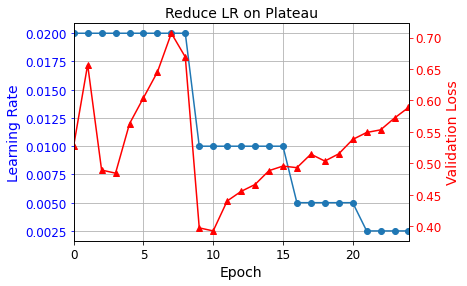

In [10]:
# Learning Rate
plt.plot(history.epoch, history.history['lr'], '-o')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs-1)
plt.grid(True)

# Validation Loss
ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r^-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

# 1Cycle Scheduling

In [11]:
import math
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    # computes the batch loss (based on the current mean loss and the previous mean loss):
    def on_batch_begin(self, epoch, logs=None):
        self.prev_loss = 0 
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))       # Append the learning rates
        self.losses.append(logs['loss'])                                         # Append the losses
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)  # Update the learning rate
        
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()                         # Get the weights from the model
    iterations = math.ceil(len(X) / batch_size) * epochs       # No of iterations
    factor = np.exp(np.log(max_rate / min_rate) / iterations)  # Factor to update the lr
    init_lr = K.get_value(model.optimizer.learning_rate)       # Get the initial lr
    K.set_value(model.optimizer.learning_rate, min_rate)       # Set the lr value to the min lr
    exp_lr = ExponentialLearningRate(factor)                   # Exp. scheduling, exp_lr as class object
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)        # Set the lr value to the initial lr
    model.set_weights(init_weights)                            # Set the weights as the init_weights
    return exp_lr.rates, exp_lr.losses 
    
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [31]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.3858


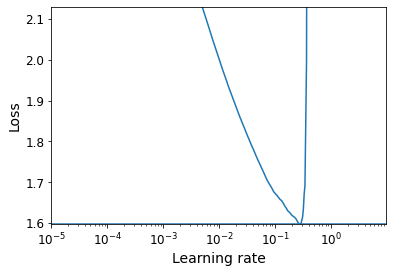

In [32]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [33]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None, last_iterations=None, last_rate=None):
        # Declare the class attributes
        self.iterations = iterations                                      # No of iterationd                                   
        self.max_rate = max_rate                                          # Max lr rate
        self.start_rate = start_rate or max_rate / 10                     # Start lr
        self.last_iterations = last_iterations or iterations // 10 + 1 
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
        
    def _interpolate(self, iter1, iter2, rate1, rate2):
        #print(iter1,iter2,rate1,rate2)
        return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2*self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2*self.half_iteration, self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2*self.half_iteration, self.iterations, self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)  # Set the lr value
        
    

In [34]:
n_epochs=25
iterations = math.ceil(len(X_train) / batch_size) * n_epochs
print(iterations)
onecycle = OneCycleScheduler(iterations,max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

10750
Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4275 - val_accuracy: 0.8524
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4122 - accuracy: 0.8546 - val_loss: 0.4116 - val_accuracy: 0.8578
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3869 - val_accuracy: 0.8688
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3639 - accuracy: 0.8716 - val_loss: 0.3766 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3457 - accuracy: 0.8773 - val_loss: 0.3739 - val_accuracy: 0.8718
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3330 - accuracy: 0.8811 - val_loss: 0.3635 - val_accuracy: 0.8704


In [35]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8864


[0.33814266324043274, 0.8863999843597412]

# Avoid overfit through regularization ($\ell_{1}$ and $\ell_{2}$)

In [36]:
# l1 reg
layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l1(0.1))
# l2 reg
layer = keras.layers.Dense(100, activation="elu",kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 6ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [38]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7247 - accuracy: 0.8222


[0.7246770262718201, 0.8222000002861023]

# Dropout

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8656
Epoch 2/2
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4230 - accuracy: 0.8453 - val_loss: 0.3479 - val_accuracy: 0.8678


In [41]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8541


[0.39317840337753296, 0.8540999889373779]

# Alpha Dropout

In [42]:
tf.random.set_seed(42)
np.random.seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6623 - accuracy: 0.7578 - val_loss: 0.5964 - val_accuracy: 0.8414
Epoch 2/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5527 - accuracy: 0.7948 - val_loss: 0.5309 - val_accuracy: 0.8466
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5233 - accuracy: 0.8065 - val_loss: 0.5206 - val_accuracy: 0.8584
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5069 - accuracy: 0.8124 - val_loss: 0.4736 - val_accuracy: 0.8614
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4911 - accuracy: 0.8192 - val_loss: 0.4821 - val_accuracy: 0.8552
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4822 - accuracy: 0.8192 - val_loss: 0.4774 - val_accuracy: 0.8594
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4742 - accuracy: 0.8236 - val_loss: 0.5186 - val_accuracy

In [46]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4695 - accuracy: 0.8573


[0.4695429801940918, 0.8572999835014343]

# MC Dropout

In [47]:
tf.random.set_seed(42)
np.random.seed(42)


In [50]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)]) # Join a sequence of arrays along an existing axis
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [56]:
y_probas.shape

(100, 10000, 10)

In [74]:
np.round(model.predict(X_test_scaled[:1]),2)
np.round(model.predict(X_test_scaled[:2]),2)
np.round(model.predict(X_test_scaled[:3]),2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [75]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.26, 0.01, 0.31]],
      dtype=float32)

In [76]:
y_pred = np.argmax(y_proba, axis=1)

In [77]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.856

In [78]:
# Build MCDropout class
class MCDropout(keras.layers.Dropout):  # keras layers as object
    def call(self, inputs):
        return super().call(inputs, training=True)
    
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)


In [79]:
tf.random.set_seed(42)
np.random.seed(42)

In [80]:
mc_model = keras.models.Sequential([MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
                                   for layer in model.layers
])

In [82]:
mc_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [83]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [84]:
mc_model.set_weights(model.get_weights())

In [86]:
# Use the model with MC Dropout
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.32, 0.  , 0.52]],
      dtype=float32)

In [90]:
np.round(mc_model.predict(X_test_scaled[:1]),3)
np.round(mc_model.predict(X_test_scaled[:2]),3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.09 , 0.   ,
        0.906],
       [0.001, 0.   , 0.883, 0.   , 0.007, 0.   , 0.108, 0.   , 0.   ,
        0.   ]], dtype=float32)

# Exercise 8 Deep Learning on CIFAR10

a. Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it is the point of this exercise). Use He initialization and the ELU activation function.

In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))     # Input layer 
for _ in range(20):                                        # Add 20 hidden layers
    model.add(keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))    # Output layer  


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

# b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

In [6]:
# Load the CIFAR10 dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data() # (50000, 32, 32, 3) and (10000, 32, 32, 3)

# Since the early stopping callback will be used, a validation set will be nevessary 
X_train = X_train_full[5000:]  ## (45000, 32, 32, 3)
y_train = y_train_full[5000:]  ## (45000, 1)
X_valid = X_train_full[:5000]  ##  (5000, 32, 32, 3)
y_valid = y_train_full[:5000]  ##  (5000, 1)



In [7]:
# optimizer (Nadam optimization )
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [9]:
# Define the callbacks
early_stop = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint = keras.callbacks.ModelCheckpoint('my_cifar10_model.h5', save_best_only=True)
# Create the callback
callbacks = [early_stop, model_checkpoint]

In [10]:
# Train the model 
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/40
1407/1407 [==============================] - 17s 12ms/step - loss: 3.9051 - accuracy: 0.1695 - val_loss: 2.1487 - val_accuracy: 0.2328
Epoch 2/40
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0426 - accuracy: 0.2543 - val_loss: 2.0474 - val_accuracy: 0.2336
Epoch 3/40
1407/1407 [==============================] - 15s 11ms/step - loss: 1.9238 - accuracy: 0.2994 - val_loss: 2.0591 - val_accuracy: 0.2596
Epoch 4/40
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8452 - accuracy: 0.3278 - val_loss: 1.8694 - val_accuracy: 0.3296
Epoch 5/40
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7907 - accuracy: 0.3498 - val_loss: 1.7851 - val_accuracy: 0.3404
Epoch 6/40
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7456 - accuracy: 0.3683 - val_loss: 1.7687 - val_accuracy: 0.3514
Epoch 7/40
1407/1407 [==============================] - 26s 18ms/step - loss: 1.7032 - accuracy: 0.3821 - val_loss: 1.7417 -

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
# Evaluate the model
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.5719 - accuracy: 0.4554


[1.5718780755996704, 0.4553999900817871]

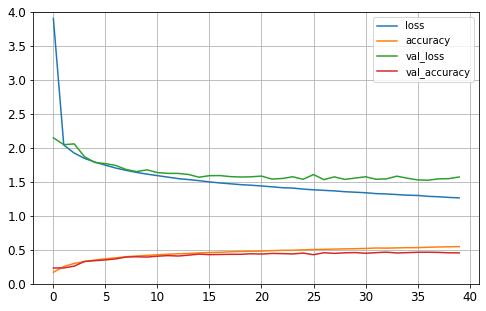

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 4)
plt.show()

The model with the lowest validation loss gets about 45.5% accuracy on the validation set. 

It took 10 epochs to reach the lowest validation loss.



# c. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?


It will be interesting to add a BN before each layer, including the first hidden layer, except for the output layer.

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))    # output layer
model.add(keras.layers.BatchNormalization())
# Add the hidden layers
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())                        # BN layer before the activation function
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)              

In [25]:
# optimizer
optimizer = keras.optimizers.Nadam(learning_rate=5e-4)  # Change the lr to 5e-4

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the callbacks
early_stop = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint = keras.callbacks.ModelCheckpoint('my_cifar10_bn_model.h5', save_best_only=True)
callbacks = [early_stop, model_checkpoint]

In [26]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/40
1407/1407 [==============================] - 31s 22ms/step - loss: 1.8380 - accuracy: 0.3410 - val_loss: 1.7334 - val_accuracy: 0.3724
Epoch 2/40
1407/1407 [==============================] - 32s 23ms/step - loss: 1.6703 - accuracy: 0.4063 - val_loss: 1.6123 - val_accuracy: 0.4294
Epoch 3/40
1407/1407 [==============================] - 32s 23ms/step - loss: 1.5968 - accuracy: 0.4318 - val_loss: 1.5615 - val_accuracy: 0.4420
Epoch 4/40
1407/1407 [==============================] - 33s 23ms/step - loss: 1.5500 - accuracy: 0.4484 - val_loss: 1.5528 - val_accuracy: 0.4474
Epoch 5/40
1407/1407 [==============================] - 45s 32ms/step - loss: 1.5076 - accuracy: 0.4679 - val_loss: 1.4469 - val_accuracy: 0.4838
Epoch 6/40
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4706 - accuracy: 0.4791 - val_loss: 1.4447 - val_accuracy: 0.4866
Epoch 7/40
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4344 - accuracy: 0.4893 - val_loss: 1.4307 -

In [ ]:
#

# d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

# e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

# f. Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

# Exercise 8 Deep Learning on CIFAR10

a. Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it is the point of this exercise). Use He initialization and the ELU activation function.

b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

c. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

f. Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

